# Система анализа алгоритмов машинного обучения для решения задач классификации с использованием Pandas

## Введение
В качестве предметной области был выбран набор данных, содержащий информацию о численности экономически активного населения, безработных, уровне безработницы и сопоставляющий эти покказатели между различными возрастными группами по субъектам РФ.

### Выбор набора данных для построения моделей машинного обучения
Данный набор данных доступен по адресу: https://data.rcsi.science/data-catalog/datasets/156/#dataset-overview

Набор данных имеет следующие атрибуты:

* territory - Наименование территории по ОКАТО
* num_economactivepopulation_all - 	Численность экономически активного населения
* employed_num_all - Занятые в экономике
* unemployed_num_all - Безработные
* eactivity_lvl - Уровень экономической активности
* employment_lvl - Уровень занятости
* unemployment_lvl - Уровень безработицы
* dis_unagegroup_to20 - Распределение безработных в возрасте до 20 лет по регионам РФ
* dis_unagegroup_20-29 - Распределение безработных в возрасте от 20 до 29 лет по регионам РФ
* dis_unagegroup_30-39 - Распределение безработных в возрасте от 30 до 39 лет по регионам РФ
* dis_unagegroup_40-49 - Распределение безработных в возрасте от 40 до 49 лет по регионам РФ
* dis_unagegroup_50-59 - Распределение безработных в возрасте от 50 до 59 лет по регионам РФ
* dis_unagegroup_60older - Распределение безработных в возрасте 60 и более лет по регионам РФ
* dis_emagegroup_to20 - Распределение занятых в экономике в возрасте до 20 лет по регионам РФ
* dis_emagegroup_20-29 - Распределение занятых в экономике в возрасте от 20 до 29 лет по регионам РФ
* dis_emagegroup_30-39 - Распределение занятых в экономике в возрасте от 30 до 39 лет по регионам РФ
* dis_emagegroup_40-49 - Распределение занятых в экономике в возрасте от 40 до 49 лет по регионам РФ
* dis_emagegroup_50-59 - Распределение занятых в экономике в возрасте от 50 до 59 лет по регионам РФ
* dis_emagegroup_60older - Распределение занятых в экономике в возрасте 60 и более лет по регионам РФ
* num_unagegroup_to20 - Численность безработных в возрасте до 20 лет по регионам РФ
* num_unagegroup_20-29 - Численность безработных в возрасте от 20 до 29 лет по регионам РФ
* num_unagegroup_30-39 - Численность безработных в возрасте от 30 до 39 лет по регионам РФ
* num_unagegroup_40-49 - Численность безработных в возрасте от 40 до 49 лет по регионам РФ
* num_unagegroup_50-59 - Численность безработных в возрасте от 50 до 59 лет по регионам РФ
* num_unagegroup_60older - Численность безработных в возрасте 60 и более лет по регионам РФ
* num_emagegroup_to20 - Численность занятых в экономике регионов РФ в возрасте до 20 лет
* num_emagegroup_20-29 - Численность занятых в экономике регионов РФ в возрасте от 20 до 29 лет
* num_emagegroup_30-39 - Численность занятых в экономике регионов РФ в возрасте от 30 до 39 лет
* num_emagegroup_40-49 - Численность занятых в экономике регионов РФ в возрасте от 40 до 49 лет
* num_emagegroup_50-59 - Численность занятых в экономике регионов РФ в возрасте от 50 до 59 лет
* num_emagegroup_60older - Численность занятых в экономике регионов РФ в возрасте 60 и более лет
* year - Отчетный год

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint, uniform
%matplotlib inline
sns.set(style="ticks")
# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных


In [2]:
data = pd.read_csv('data.csv')

### Анализ датасета
##### Основные характеристики датасета
Первые 5 строк датасета:

In [3]:
data.head()

,territory,num_economactivepopulation_all,employed_num_all,unemployed_num_all,eactivity_lvl,employment_lvl,unemployment_lvl,dis_unagegroup_to20,dis_unagegroup_20-29,dis_unagegroup_30-39,...,num_unagegroup_40-49,num_unagegroup_50-59,num_unagegroup_60older,num_emagegroup_to20,num_emagegroup_20-29,num_emagegroup_30-39,num_emagegroup_40-49,num_emagegroup_50-59,num_emagegroup_60older,year
0,Российская Федерация,70816.1,64400.1,6416.0,64.2,58.4,9.1,8.2,30.7,24.8,...,1552.7,622.4,154.0,1416.8,14039.2,17066.0,19770.8,9402.4,2833.6,2001
1,Центральный федеральный округ,18337.9,17181.9,1156.0,64.6,60.5,6.3,7.9,29.8,24.6,...,282.1,120.2,33.5,292.1,3453.6,4450.1,5257.7,2783.5,945.0,2001
2,Белгородская область,737.9,689.6,48.3,65.4,61.1,6.5,6.0,43.4,17.2,...,9.4,4.3,2.4,13.1,148.3,186.9,209.6,85.5,46.2,2001
3,Брянская область,653.5,588.1,65.3,61.0,54.9,10.0,5.9,33.3,28.0,...,15.4,5.4,0.7,16.5,135.9,159.4,180.5,72.9,22.9,2001
4,Владимирская область,808.9,728.4,80.5,65.4,58.9,9.9,13.2,32.4,21.4,...,20.1,4.0,2.5,16.8,157.3,187.2,221.4,112.2,33.5,2001


Размер датасета:

In [4]:
data.shape

(831, 32)

Столбцы:

In [5]:
data.columns

Index(['territory', 'num_economactivepopulation_all', 'employed_num_all',
       'unemployed_num_all', 'eactivity_lvl', 'employment_lvl',
       'unemployment_lvl', 'dis_unagegroup_to20', 'dis_unagegroup_20-29',
       'dis_unagegroup_30-39', 'dis_unagegroup_40-49', 'dis_unagegroup_50-59',
       'dis_unagegroup_60older', 'dis_emagegroup_to20', 'dis_emagegroup_20-29',
       'dis_emagegroup_30-39', 'dis_emagegroup_40-49', 'dis_emagegroup_50-59',
       'dis_emagegroup_60older', 'num_unagegroup_to20', 'num_unagegroup_20-29',
       'num_unagegroup_30-39', 'num_unagegroup_40-49', 'num_unagegroup_50-59',
       'num_unagegroup_60older', 'num_emagegroup_to20', 'num_emagegroup_20-29',
       'num_emagegroup_30-39', 'num_emagegroup_40-49', 'num_emagegroup_50-59',
       'num_emagegroup_60older', 'year'],
      dtype='object')

Удалим лишние столбцы:

In [6]:
data = data.filter(['num_economactivepopulation_all',
                    'employed_num_all', 'unemployed_num_all',
                    'eactivity_lvl', 'employment_lvl','unemployment_lvl',
                    'num_unagegroup_to20', 'num_unagegroup_20-29',
                    'num_unagegroup_30-39', 'num_unagegroup_40-49',
                    'num_unagegroup_50-59',  'num_unagegroup_60older',
                    'year'])
data.head()

,num_economactivepopulation_all,employed_num_all,unemployed_num_all,eactivity_lvl,employment_lvl,unemployment_lvl,num_unagegroup_to20,num_unagegroup_20-29,num_unagegroup_30-39,num_unagegroup_40-49,num_unagegroup_50-59,num_unagegroup_60older,year
0,70816.1,64400.1,6416.0,64.2,58.4,9.1,526.1,1969.7,1591.2,1552.7,622.4,154.0,2001
1,18337.9,17181.9,1156.0,64.6,60.5,6.3,91.3,344.5,284.4,282.1,120.2,33.5,2001
2,737.9,689.6,48.3,65.4,61.1,6.5,2.9,21.0,8.3,9.4,4.3,2.4,2001
3,653.5,588.1,65.3,61.0,54.9,10.0,3.9,21.7,18.3,15.4,5.4,0.7,2001
4,808.9,728.4,80.5,65.4,58.9,9.9,10.6,26.1,17.2,20.1,4.0,2.5,2001


### Предварительная обработка данных

#### Заменим названия колонок

In [7]:
data.rename(columns = {
    'num_economactivepopulation_all' : 'Численность населения',
    'employed_num_all' : 'Занятые в экономике',
    'unemployed_num_all' : 'Безработные',
    'eactivity_lvl' : 'Уровень экономической активности',
    'employment_lvl' : 'Уровень занятости',
    'unemployment_lvl' : 'Уровень безработицы',
    'num_unagegroup_to20' : 'Численность безработных (до 20 лет)',
    'num_unagegroup_20-29' : 'Численность безработных (от 20 до 29 лет)',
    'num_unagegroup_30-39' : 'Численность безработных (от 30 до 39 лет)',
    'num_unagegroup_40-49' : 'Численность безработных (от 40 до 49 лет)',
    'num_unagegroup_50-59' : 'Численность безработных (от 50 до 59 лет)',
    'num_unagegroup_60older' : 'Численность безработных (60 и более лет)',
    'year' : 'Год',
}, inplace = True)

In [8]:
list(data.columns)

['Численность населения',
 'Занятые в экономике',
 'Безработные',
 'Уровень экономической активности',
 'Уровень занятости',
 'Уровень безработицы',
 'Численность безработных (до 20 лет)',
 'Численность безработных (от 20 до 29 лет)',
 'Численность безработных (от 30 до 39 лет)',
 'Численность безработных (от 40 до 49 лет)',
 'Численность безработных (от 50 до 59 лет)',
 'Численность безработных (60 и более лет)',
 'Год']

#### Проверка и обработка пропущенных значений
Определим столбцы с пропусками данных:

In [9]:
data.isnull().sum()

Численность населения                         2
Занятые в экономике                           2
Безработные                                   2
Уровень экономической активности              2
Уровень занятости                             2
Уровень безработицы                           2
Численность безработных (до 20 лет)           3
Численность безработных (от 20 до 29 лет)     2
Численность безработных (от 30 до 39 лет)     2
Численность безработных (от 40 до 49 лет)     2
Численность безработных (от 50 до 59 лет)     2
Численность безработных (60 и более лет)     14
Год                                           0
dtype: int64

Видим, что в каждом стобце есть пропущенные значения, кроме "Год".

In [10]:
# проверяем пропуска, во всех ли столбцах они есть
data[pd.isnull(data).any(axis=1)]

,Численность населения,Занятые в экономике,Безработные,Уровень экономической активности,Уровень занятости,Уровень безработицы,Численность безработных (до 20 лет),Численность безработных (от 20 до 29 лет),Численность безработных (от 30 до 39 лет),Численность безработных (от 40 до 49 лет),Численность безработных (от 50 до 59 лет),Численность безработных (60 и более лет),Год
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
468,394.1,371.1,23.0,65.6,61.8,5.8,0.6,7.1,5.6,6.2,3.5,NaN,2013
471,533.2,508.6,24.6,63.7,60.8,4.6,0.6,7.2,5.8,6.3,4.8,NaN,2013
523,324.8,314.5,10.3,77.0,74.6,3.2,0.6,5.6,1.8,0.9,1.4,NaN,2013
528,122.0,98.5,23.5,57.7,46.6,19.3,0.6,10.4,6.9,4.5,1.1,NaN,2013
547,33.2,32.1,1.1,83.1,80.4,3.3,0.1,0.4,0.3,0.2,0.1,NaN,2013
655,378.5,353.9,24.6,65.9,61.7,6.5,0.7,8.5,7.2,4.6,3.6,NaN,2017
676,200.1,182.5,17.6,60.2,54.9,8.8,0.2,4.7,5.5,4.5,2.6,NaN,2017
683,202.0,192.8,9.2,63.8,60.9,4.6,NaN,3.0,2.0,1.7,1.9,0.6,2017


Видим, что строка 40 и 131 с пустыми значениями. Предположительно по этим строкам не фиксировались данные, поэтому мы исключим их.

In [11]:
# удаляем строки, в которых отсутствуют данные по всем ячейкам. Это строки 40 и 131
data.drop(labels = [40,131],axis = 0, inplace = True)

Проверим сколько пропусков у нас осталось сейчас.

In [12]:
data.isnull().sum()

Численность населения                         0
Занятые в экономике                           0
Безработные                                   0
Уровень экономической активности              0
Уровень занятости                             0
Уровень безработицы                           0
Численность безработных (до 20 лет)           1
Численность безработных (от 20 до 29 лет)     0
Численность безработных (от 30 до 39 лет)     0
Численность безработных (от 40 до 49 лет)     0
Численность безработных (от 50 до 59 лет)     0
Численность безработных (60 и более лет)     12
Год                                           0
dtype: int64

In [13]:
# Замена пропущенных значений средними значением по столбцу
data['Численность безработных (до 20 лет)'].fillna(data['Численность безработных (до 20 лет)'].mean(), inplace=True)
data['Численность безработных (60 и более лет)'].fillna(data['Численность безработных (60 и более лет)'].mean(), inplace=True)

In [14]:
data.isnull().sum()

Численность населения                        0
Занятые в экономике                          0
Безработные                                  0
Уровень экономической активности             0
Уровень занятости                            0
Уровень безработицы                          0
Численность безработных (до 20 лет)          0
Численность безработных (от 20 до 29 лет)    0
Численность безработных (от 30 до 39 лет)    0
Численность безработных (от 40 до 49 лет)    0
Численность безработных (от 50 до 59 лет)    0
Численность безработных (60 и более лет)     0
Год                                          0
dtype: int64

#### Проверка и обработка дубликатов

In [15]:
# проверим количество дубликатов (метод duplicated())
sum_duplicated = data.duplicated().sum()
print('Количество дубликатов: ', sum_duplicated)

Количество дубликатов:  0


#### Проверка и обработка типов данных

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 830
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Численность населения                      829 non-null    float64
 1   Занятые в экономике                        829 non-null    float64
 2   Безработные                                829 non-null    float64
 3   Уровень экономической активности           829 non-null    float64
 4   Уровень занятости                          829 non-null    float64
 5   Уровень безработицы                        829 non-null    float64
 6   Численность безработных (до 20 лет)        829 non-null    float64
 7   Численность безработных (от 20 до 29 лет)  829 non-null    float64
 8   Численность безработных (от 30 до 39 лет)  829 non-null    float64
 9   Численность безработных (от 40 до 49 лет)  829 non-null    float64
 10  Численность безработных (от 50 

In [17]:
# изменением на int
data['Численность населения'] = data['Численность населения'].astype(int)
data['Занятые в экономике'] = data['Занятые в экономике'].astype(int)
data['Безработные'] = data['Безработные'].astype(int)
# изменением на object
data['Год'] = data['Год'].astype(object) # Целевой признак

In [18]:
data.dtypes

Численность населения                          int32
Занятые в экономике                            int32
Безработные                                    int32
Уровень экономической активности             float64
Уровень занятости                            float64
Уровень безработицы                          float64
Численность безработных (до 20 лет)          float64
Численность безработных (от 20 до 29 лет)    float64
Численность безработных (от 30 до 39 лет)    float64
Численность безработных (от 40 до 49 лет)    float64
Численность безработных (от 50 до 59 лет)    float64
Численность безработных (60 и более лет)     float64
Год                                           object
dtype: object

### Кодирование категориальных признаков

Возьмем в качестве целевой переменной стоблец "Год"

In [19]:
data['Год'].unique()

array([2001, 2004, 2007, 2009, 2012, 2013, 2015, 2017, 2019], dtype=object)

Для решения задачи классификации выберем два класса. Это год 2001 и 2019

In [20]:
data[data['Год'].isin([2001, 2019])]

,Численность населения,Занятые в экономике,Безработные,Уровень экономической активности,Уровень занятости,Уровень безработицы,Численность безработных (до 20 лет),Численность безработных (от 20 до 29 лет),Численность безработных (от 30 до 39 лет),Численность безработных (от 40 до 49 лет),Численность безработных (от 50 до 59 лет),Численность безработных (60 и более лет),Год
0,70816,64400,6416,64.2,58.4,9.1,526.1,1969.7,1591.2,1552.7,622.4,154.000000,2001
1,18337,17181,1156,64.6,60.5,6.3,91.3,344.5,284.4,282.1,120.2,33.500000,2001
2,737,689,48,65.4,61.1,6.5,2.9,21.0,8.3,9.4,4.3,2.400000,2001
3,653,588,65,61.0,54.9,10.0,3.9,21.7,18.3,15.4,5.4,0.700000,2001
4,808,728,80,65.4,58.9,9.9,10.6,26.1,17.2,20.1,4.0,2.500000,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,407,385,21,63.3,59.9,5.4,0.2,7.9,6.4,4.1,3.3,5.143452,2019
827,85,81,3,72.4,69.1,4.6,0.1,0.5,1.2,0.4,1.1,0.700000,2019
828,274,260,14,68.7,65.2,5.2,0.3,3.9,2.8,2.4,1.7,3.100000,2019
829,77,72,4,59.7,56.0,6.2,0.2,0.9,1.3,1.3,0.8,0.300000,2019


Создадим новый датасет, в котором хранятся данные за 2001 и 2019 год

In [21]:
data_1 = data[data['Год'].isin([2001, 2019])]

In [22]:
data_1['Год'].unique()

array([2001, 2019], dtype=object)

Убедимся, что целевой признак для задачи бинарной классификации содержит только 0 и 1

In [23]:
# присваиваем целочисленные значения для каждой категории
labelencoder = LabelEncoder()
data_1['Год'] = labelencoder.fit_transform(data_1['Год'])
data_1 = data_1.astype({"Год":"int64"})
data_1['Год'].unique()

array([0, 1], dtype=int64)

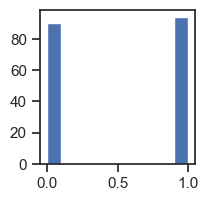

In [24]:
# Оценим дисбаланс классов
fig, ax = plt.subplots(figsize=(2,2))
plt.hist(data_1['Год'])
plt.show()

In [25]:
data_1['Год'].value_counts()

Год
1    94
0    90
Name: count, dtype: int64

In [26]:
# посчитаем дисбаланс классов
total = data_1.shape[0]
class_0, class_1 = data_1['Год'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 51.09%, а класс 1 составляет 48.91%.


Присутствует незначительный дисбаланс классов.

## Скачаем новый датасет "data_1"

In [27]:
from IPython.display import HTML, display
import base64
import requests

In [28]:
def check_internet_connection(url='http://www.google.com/', timeout=5):
    try:
        _ = requests.get(url, timeout=timeout)
        return True
    except requests.ConnectionError:
        return False

In [32]:
def create_download_link(data, title="Скачать CSV файл", filename="data_1.csv"):
  csv = data_1.to_csv(index=False)
  b64 = base64.b64encode(csv.encode()).decode()
  href = f'<a href="data:file/csv;base64,{b64}" download="{filename}">{title}</a>'
  return HTML(href)

In [33]:
if check_internet_connection():
    download_link = create_download_link(data)
    display(download_link)

### Масштабирование данных

In [27]:
data_1.dtypes

Численность населения                          int32
Занятые в экономике                            int32
Безработные                                    int32
Уровень экономической активности             float64
Уровень занятости                            float64
Уровень безработицы                          float64
Численность безработных (до 20 лет)          float64
Численность безработных (от 20 до 29 лет)    float64
Численность безработных (от 30 до 39 лет)    float64
Численность безработных (от 40 до 49 лет)    float64
Численность безработных (от 50 до 59 лет)    float64
Численность безработных (60 и более лет)     float64
Год                                            int64
dtype: object

Категориальный признак "Год" был закодировани заранее, другие категориальные признаки отсутствуют.

In [28]:
# Числовые колонки для масштабирования
scale_cols = [ 'Численность населения',
               'Занятые в экономике',
               'Безработные',
               'Уровень экономической активности',
               'Уровень занятости',
               'Уровень безработицы',
                'Численность безработных (до 20 лет)',
               'Численность безработных (от 20 до 29 лет)',
               'Численность безработных (от 30 до 39 лет)',
               'Численность безработных (от 40 до 49 лет)',
               'Численность безработных (от 50 до 59 лет)',
               'Численность безработных (60 и более лет)']

In [29]:
# Преобразование значения признаков таким образом,
# чтобы они находились в диапазоне от 0 до 1
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_1[scale_cols])

In [30]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_1[new_col_name] = sc1_data[:,i]

In [31]:
data_1.head()

,Численность населения,Занятые в экономике,Безработные,Уровень экономической активности,Уровень занятости,Уровень безработицы,Численность безработных (до 20 лет),Численность безработных (от 20 до 29 лет),Численность безработных (от 30 до 39 лет),Численность безработных (от 40 до 49 лет),...,Безработные_scaled,Уровень экономической активности_scaled,Уровень занятости_scaled,Уровень безработицы_scaled,Численность безработных (до 20 лет)_scaled,Численность безработных (от 20 до 29 лет)_scaled,Численность безработных (от 30 до 39 лет)_scaled,Численность безработных (от 40 до 49 лет)_scaled,Численность безработных (от 50 до 59 лет)_scaled,Численность безработных (60 и более лет)_scaled
0,70816,64400,6416,64.2,58.4,9.1,526.1,1969.7,1591.2,1552.7,...,1.000000,0.409420,0.543269,0.229851,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,18337,17181,1156,64.6,60.5,6.3,91.3,344.5,284.4,282.1,...,0.180047,0.423913,0.593750,0.146269,0.173541,0.174732,0.178527,0.181631,0.192994,0.217532
2,737,689,48,65.4,61.1,6.5,2.9,21.0,8.3,9.4,...,0.007327,0.452899,0.608173,0.152239,0.005512,0.010461,0.004966,0.005990,0.006749,0.015584
3,653,588,65,61.0,54.9,10.0,3.9,21.7,18.3,15.4,...,0.009977,0.293478,0.459135,0.256716,0.007413,0.010816,0.011252,0.009854,0.008517,0.004545
4,808,728,80,65.4,58.9,9.9,10.6,26.1,17.2,20.1,...,0.012315,0.452899,0.555288,0.253731,0.020148,0.013050,0.010561,0.012882,0.006267,0.016234


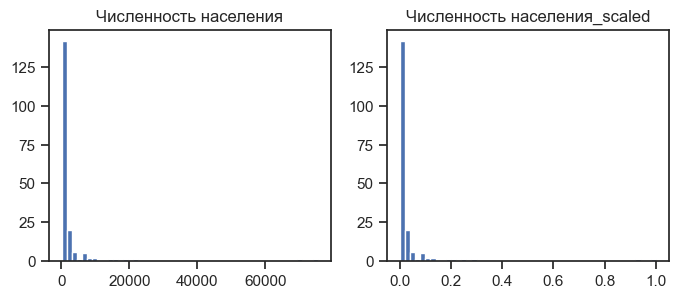

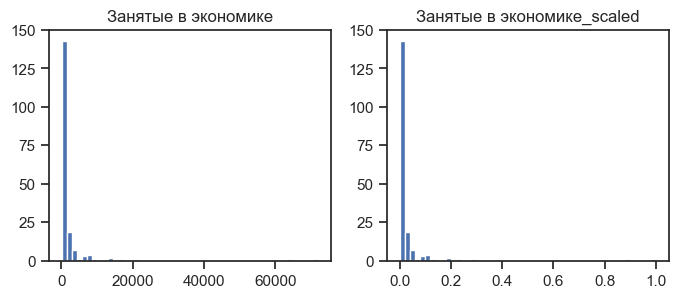

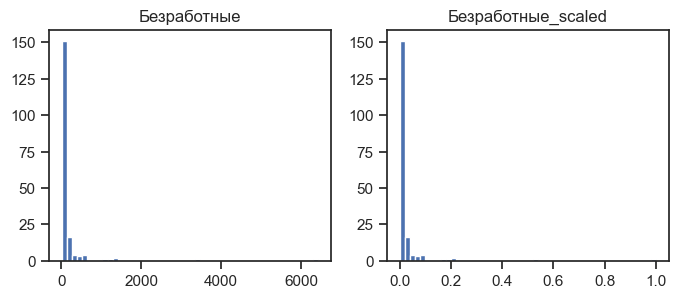

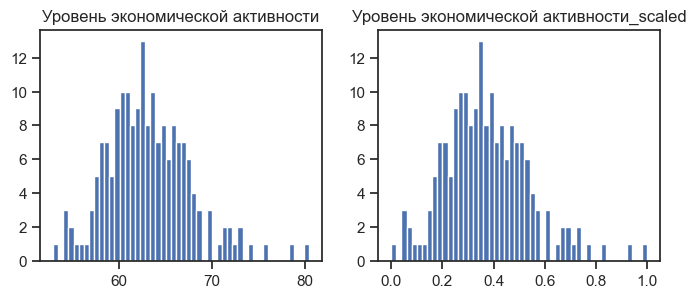

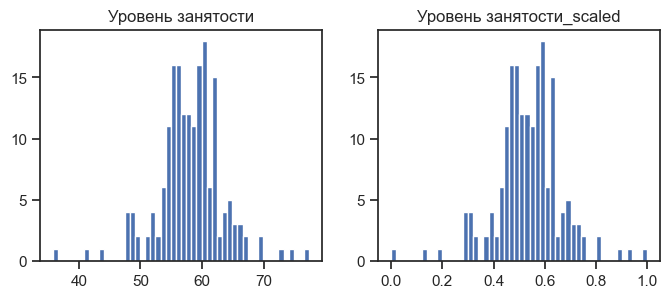

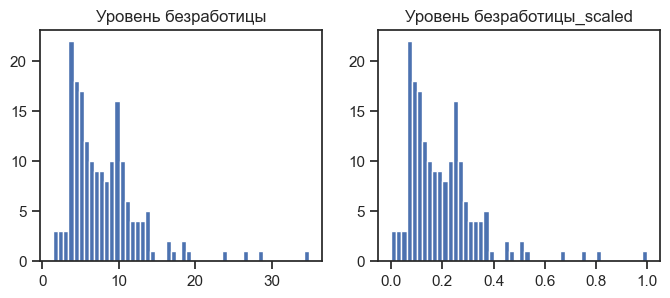

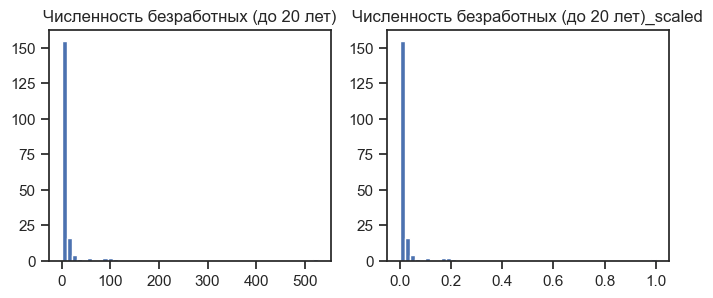

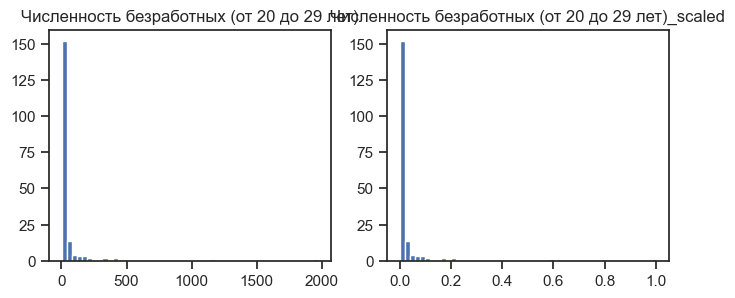

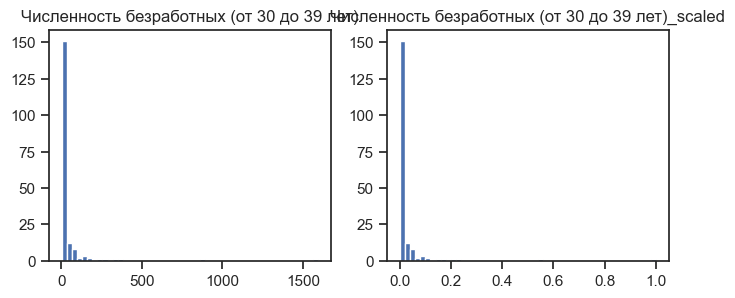

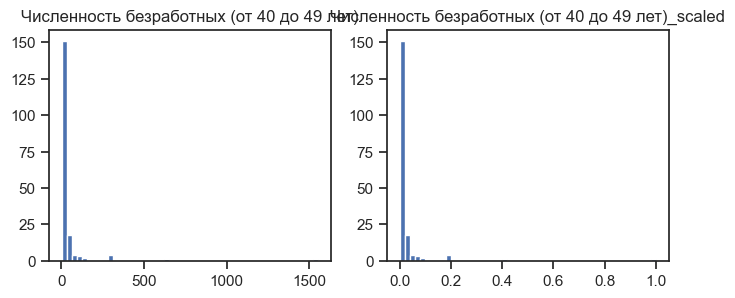

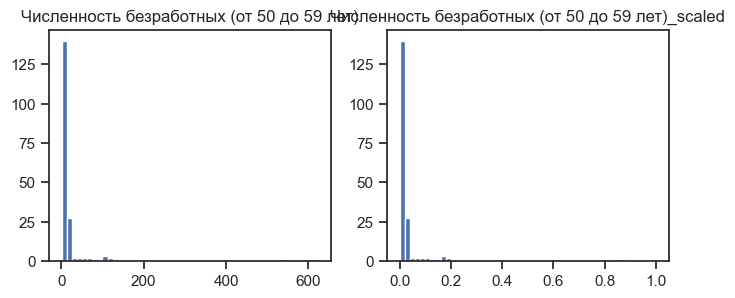

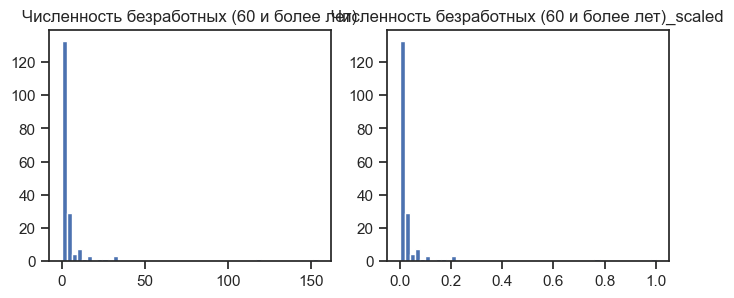

In [32]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_1[col], 50)
    ax[1].hist(data_1[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

Масштабирование данных не повлияло на распределение данных

### Корреляционный анализ данных

In [33]:
# Воспользуемся наличием тестовых выборок,
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols + ['Год']
corr_cols_1

['Численность населения',
 'Занятые в экономике',
 'Безработные',
 'Уровень экономической активности',
 'Уровень занятости',
 'Уровень безработицы',
 'Численность безработных (до 20 лет)',
 'Численность безработных (от 20 до 29 лет)',
 'Численность безработных (от 30 до 39 лет)',
 'Численность безработных (от 40 до 49 лет)',
 'Численность безработных (от 50 до 59 лет)',
 'Численность безработных (60 и более лет)',
 'Год']

In [34]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['Год']
corr_cols_2

['Численность населения_scaled',
 'Занятые в экономике_scaled',
 'Безработные_scaled',
 'Уровень экономической активности_scaled',
 'Уровень занятости_scaled',
 'Уровень безработицы_scaled',
 'Численность безработных (до 20 лет)_scaled',
 'Численность безработных (от 20 до 29 лет)_scaled',
 'Численность безработных (от 30 до 39 лет)_scaled',
 'Численность безработных (от 40 до 49 лет)_scaled',
 'Численность безработных (от 50 до 59 лет)_scaled',
 'Численность безработных (60 и более лет)_scaled',
 'Год']

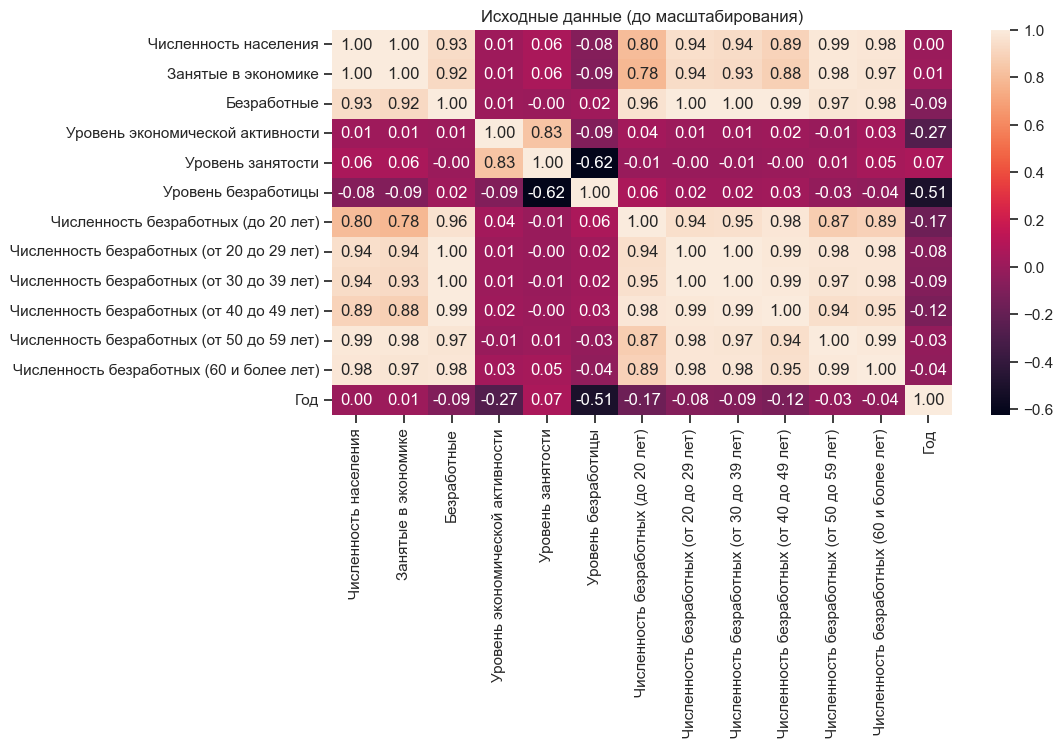

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_1[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

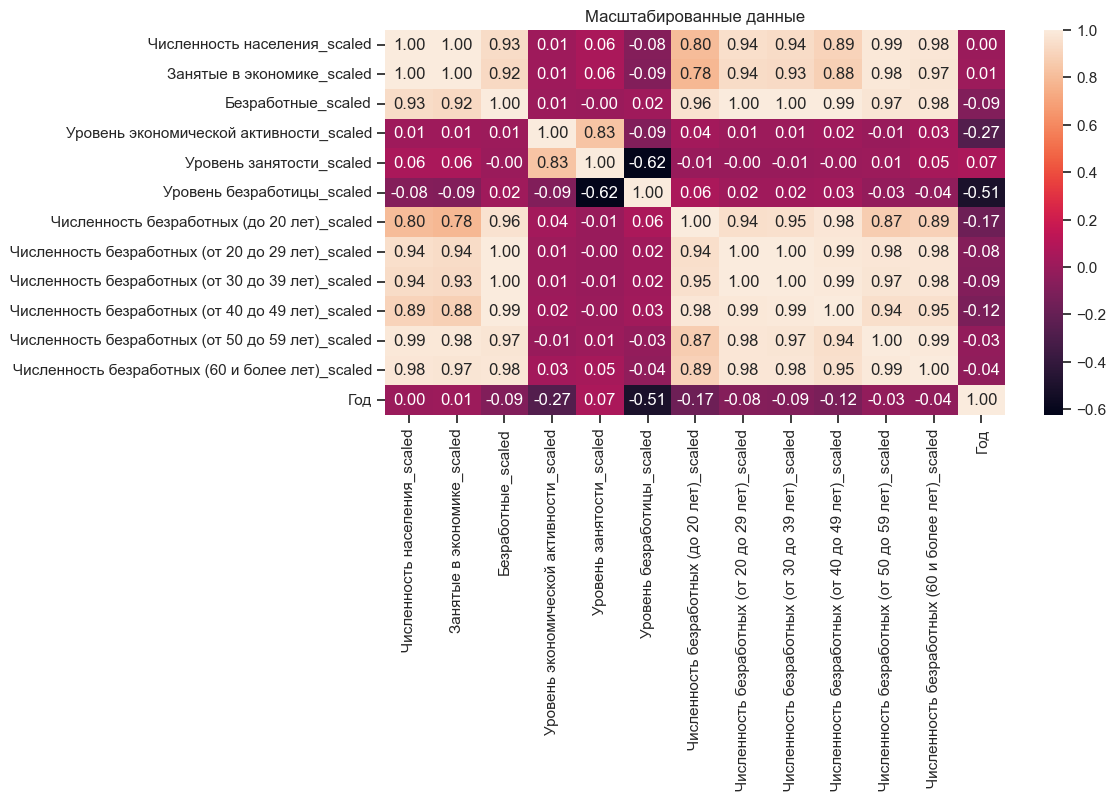

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_1[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

Корреляционные матрицы для исходных и масштабированных данных совпадают.

Целевой признак классификации "Год" наиболее сильно коррелирует с "Уровнем занятости" (0.07), "Занятые в экономике" (0.01), "Численность населения" (0.00). Эти признаки обязательно следует оставить в модели классификации.

### Формирование обучающей и тестовой выборок на основе исходного набора данных

In [37]:
X = data_1[['Уровень занятости', 'Занятые в экономике', 'Численность населения']] # Наименование признаков
y = data_1['Год'] # Целевая переменная

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# Размер обучающей выборки
X_train.shape, y_train.shape

((147, 3), (147,))

In [40]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((37, 3), (37,))

### Выбор алгоритмов машинного обучения для решения задачи классификации

* Логистическая регрессия

Используется для оценки дискретных значений, обычно двоичных, таких как 0 и 1, да или нет. Он предсказывает вероятность принадлежности экземпляра к классу, что делает его незаменимым для задач бинарной классификации, таких как обнаружение спама или диагностика заболеваний.


* К-ближайших соседей (KNN)

KNN классифицирует объект на основе меток классов его ближайщих соседей в пространстве признаков.

* Случайный лес


 Он создает множество решающих деревьев, то есть независимых моделей, и использует их для предсказания классов объектов.

### Метрики для оценки качества моделей

В качестве метрик для решения задачи классификации будем использовать:

* Accuary (точность):

Доля правильно классифицированных объектов среди всех объектов.

* Precision (Точность):

Доля истинно положительных среди всех объектов, которые модель классифицировала как положительные. Она измеряет, насколько много из предсказанных положительных случаев действительно положительные.

* Recall (Полнота):

Доля истинно положительных объектов среди всех действительно положительных объектов. Она измеряет, насколько много реальных положительных случаев было предсказано моделью.

* Метрика F1-мера:

Гармоническое среднее между точностью и полнотой.




### Логическая регрессия

In [45]:
# Создание и обучение модели логистической регрессии
model = LogisticRegression()
model.fit (X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
# Предсказание и оценка производительности
accuracy_model = accuracy_score(y_test, y_pred)
precision_model = precision_score(y_test, y_pred)
recall_model = recall_score(y_test, y_pred)
f1_model = f1_score(y_test, y_pred)

### К-ближайших соседей

In [47]:
# Создание и обучение модели К-ближайших соседей
model2 = KNeighborsClassifier()
model2.fit (X_train, y_train)
y_pred2 = model2.predict(X_test)

In [48]:
# Предсказание и оценка производительности
accuracy_model2 = accuracy_score(y_test, y_pred2)
precision_model2 = precision_score(y_test, y_pred2)
recall_model2 = recall_score(y_test, y_pred2)
f1_model2 = f1_score(y_test, y_pred2)

### Случайный лес

In [49]:
# Создание и обучение модели случайный лес
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [50]:
# Предсказание и оценка производительности
accuracy_model3 = accuracy_score(y_test, y_pred3)
precision_model3 = precision_score(y_test, y_pred3)
recall_model3 = recall_score(y_test, y_pred3)
f1_model3 = f1_score(y_test, y_pred3)

### Результаты сравнения моделей

In [51]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_model}")
print(f"Precision: {precision_model}")
print(f"Recall: {recall_model}")
print(f"F1 Score: {f1_model}")
print("\nKNN:")
print(f"Accuracy: {accuracy_model2}")
print(f"Precision: {precision_model2}")
print(f"Recall: {recall_model2}")
print(f"F1 Score: {f1_model2}")
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_model3}")
print(f"Precision: {precision_model3}")
print(f"Recall: {recall_model3}")
print(f"F1 Score: {f1_model3}")

Logistic Regression:
Accuracy: 0.8108108108108109
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1 Score: 0.8444444444444444

KNN:
Accuracy: 0.5405405405405406
Precision: 0.6470588235294118
Recall: 0.5
F1 Score: 0.5641025641025642

Random Forest:
Accuracy: 0.3783783783783784
Precision: 0.4666666666666667
Recall: 0.3181818181818182
F1 Score: 0.3783783783783784


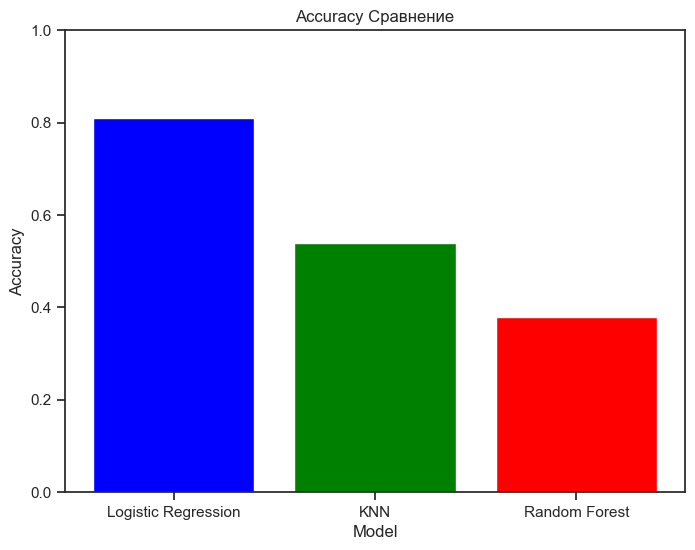

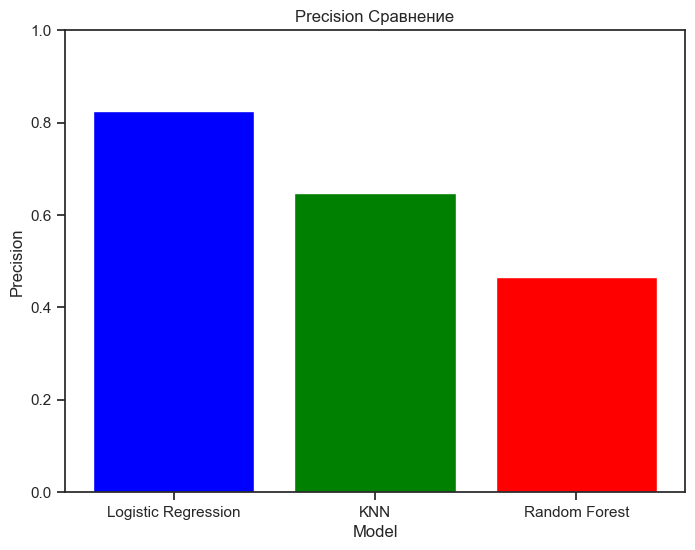

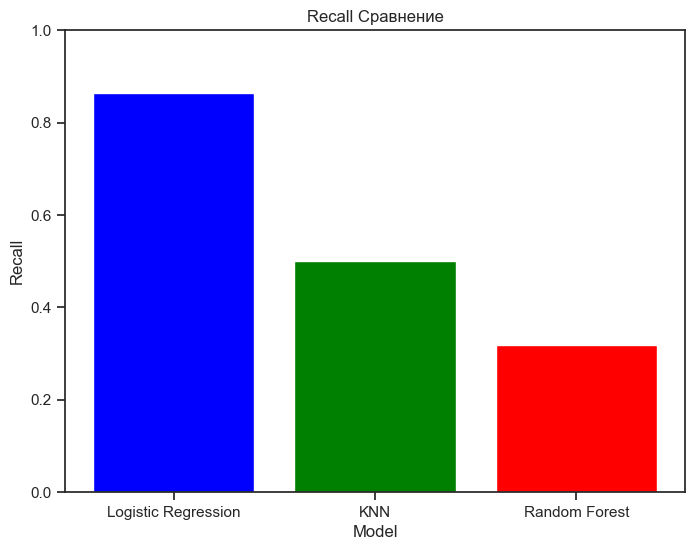

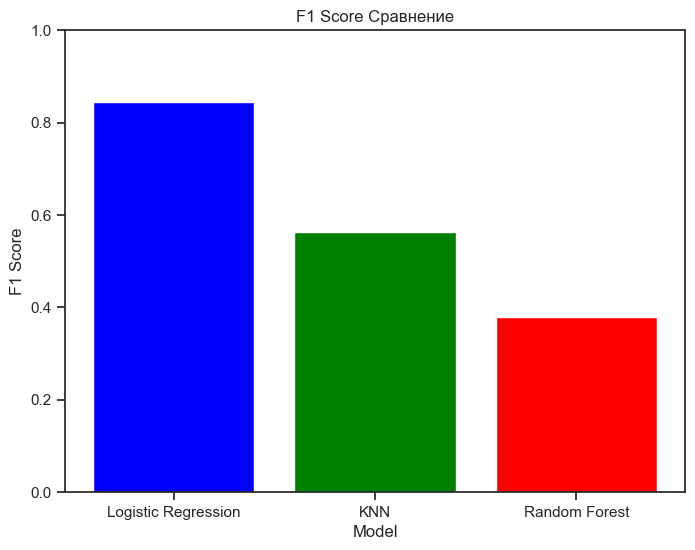

In [52]:
# Результаты моделей в виде графиков
results = {
    'Logistic Regression': {'Accuracy': 0.8108, 'Precision': 0.8261, 'Recall': 0.8636, 'F1 Score': 0.8444},
    'KNN': {'Accuracy': 0.5405, 'Precision': 0.6471, 'Recall': 0.5, 'F1 Score': 0.5641},
    'Random Forest': {'Accuracy': 0.3783, 'Precision': 0.4667, 'Recall': 0.3181, 'F1 Score': 0.3783}
}

# Построение графиков для каждой метрики
metrics = list(results['Logistic Regression'].keys())
for metric in metrics:
    values = [results[model][metric] for model in results]
    plt.figure(figsize=(8, 6))
    plt.bar(results.keys(), values, color=['blue', 'green', 'red'])
    plt.title(f'{metric} Сравнение')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)  # Установка границ для оси y
    plt.show()

### Вывод результата анализа

1. Логистическая регрессия показала наилучший результат среди всех моделей. Она имеет наивысшие показатели по всем метрикам: точность (0.8108), точность (0.8261), полнота (0.8636) и F1-мера (0.8444). Это указывает на хорошее общее качество модели, уравновешенное между правильными предсказаниями и пропущенными положительными случаями.


2. К-ближайших соседей (KNN) имеет средние результаты по сравнению с другими моделями. Точность (0.5405), точность (0.6471), полнота (0.5) и F1-мера (0.5641) значительно ниже, чем у логистической регрессии. Это указывает на то, что KNN менее эффективен для данной задачи.


3. Случайный лес показала наихудшие результаты. Точность (0.3783), точность (0.4667), полнота (0.3181) и F1-мера (0.3783) являются самыми низкими среди всех моделей. Это может указывать на проблемы с переобучением или недостаточной настройкой гипепараметров модели.

На основе проведенного сравнения, логистическая регрессия является наилучшей моделью для данной задачи классификации. Она демонстрирует высокие показатели по всем ключевым метрикам, что делает ее предпочительным выбором.

